# Simple Analysis of IPL 2022
#### **By Ika Nurfitriani**

## About Dataset
The IPL 2022 Mega Player auction have featured a total of 600 players who were set to go under the hammer in Bengaluru. The initial list had over 1000 cricketers who had registered for the auction. However, the final list was trimmed to 590. There was a total of 217 slots spread across ten franchises up for grabs. Among the 600 players, 229 are capped players, 371 are uncapped players.<br>
The dataset includes Data of all sold and unsold players.<br>
Data Columns:<br>
- Index Number
- Player Name
- Base Price
- Type of the player
- Total Cost in Cr Indian Rupees
- Total Cost in USD
- Team of the Player in 2021
- Team of the Player in 2022

# A. Import library
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# B. Data Loading
***

In [2]:
df_ipl = pd.read_csv('ipl_2022_dataset.csv')

In [3]:
df_ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
# Melihat informasi dimensi dari dataset
rows, columns = df_ipl.shape
print("Dimensi data IPL-2022:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data IPL-2022:
633 baris
8 kolom


In [5]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [6]:
df_ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [41]:
# Melihat banyaknya nilai dari setiap atribut
for col in df_ipl.columns:
    print(col, ': ')
    print(df_ipl[col].value_counts())
    print('-'*50)

Player : 
Lalit Yadav        2
Amit Mishra        2
Shivam Sharma      2
Shubham Singh      2
Rashid Khan        1
                  ..
Dhruv Jurel        1
Tejas Baroka       1
Kuldip Yadav       1
Shubham Garhwal    1
Aaron Hardie       1
Name: Player, Length: 629, dtype: int64
--------------------------------------------------
Base Price : 
20 Lakh     344
50 Lakh     104
2 Cr         48
1 Cr         33
Retained     27
75 Lakh      26
1.5 Cr       20
40 Lakh      16
30 Lakh       9
0             6
Name: Base Price, dtype: int64
--------------------------------------------------
TYPE : 
ALL-ROUNDER     242
BOWLER          215
BATTER          112
WICKETKEEPER     64
Name: TYPE, dtype: int64
--------------------------------------------------
COST IN ₹ (CR.) : 
0.00     396
0.20      52
0.50      17
2.00      13
4.00       8
        ... 
11.50      1
3.60       1
12.25      1
2.80       1
3.20       1
Name: COST IN ₹ (CR.), Length: 66, dtype: int64
--------------------------------------

# C. Data Cleaning
***

In [8]:
df_ipl.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df_ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [10]:
df_ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [11]:
df_ipl[df_ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [12]:
df_ipl['COST IN ₹ (CR.)'] = df_ipl['COST IN ₹ (CR.)'].fillna(0)
df_ipl['Cost IN $ (000)'] = df_ipl['Cost IN $ (000)'].fillna(0)

In [13]:
df_ipl[df_ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [14]:
df_ipl['2021 Squad'] = df_ipl['2021 Squad'].fillna('Not Participated')

In [15]:
df_ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [16]:
teams = df_ipl[df_ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [17]:
df_ipl['Status'] = df_ipl['Team'].replace(teams, 'Sold')

In [18]:
df_ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold


In [19]:
df_ipl[df_ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


# D. Exploratory Data Analysis (EDA)
***

## How many players have participated in 2022 IPL Auction?

In [20]:
print("Many players have participated in 2022 IPL Auction:", df_ipl.shape[0])

Many players have participated in 2022 IPL Auction: 633


## How many types of players have participated?

In [21]:
types = df_ipl['TYPE'].value_counts()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

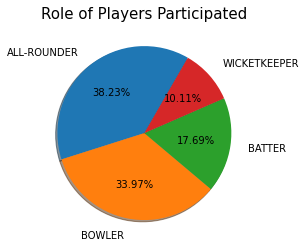

In [22]:
plt.pie(types.values, labels=types.index, labeldistance=1.2, autopct='%1.2f%%', shadow=True, startangle=60)
plt.title('Role of Players Participated', fontsize=15)
plt.plot()

## Players sold and unsold using a bar graph

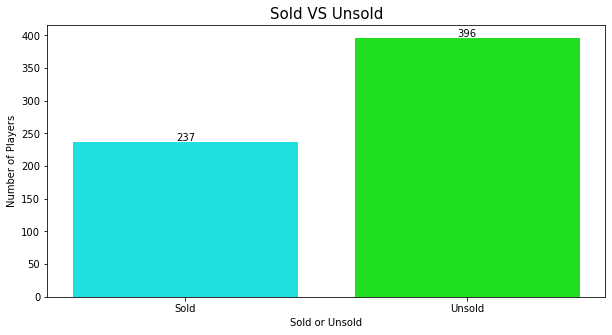

In [23]:
plt.figure(figsize=(10,5))
fig = sns.countplot(df_ipl['Status'], palette=['Aqua', 'Lime'])
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of Players')
plt.title('Sold VS Unsold', fontsize=15)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,4), textcoords='offset points')

In [24]:
df_ipl.groupby('Status')['Player'].count()

Status
Sold      237
Unsold    396
Name: Player, dtype: int64

## Total number of players bought by each team

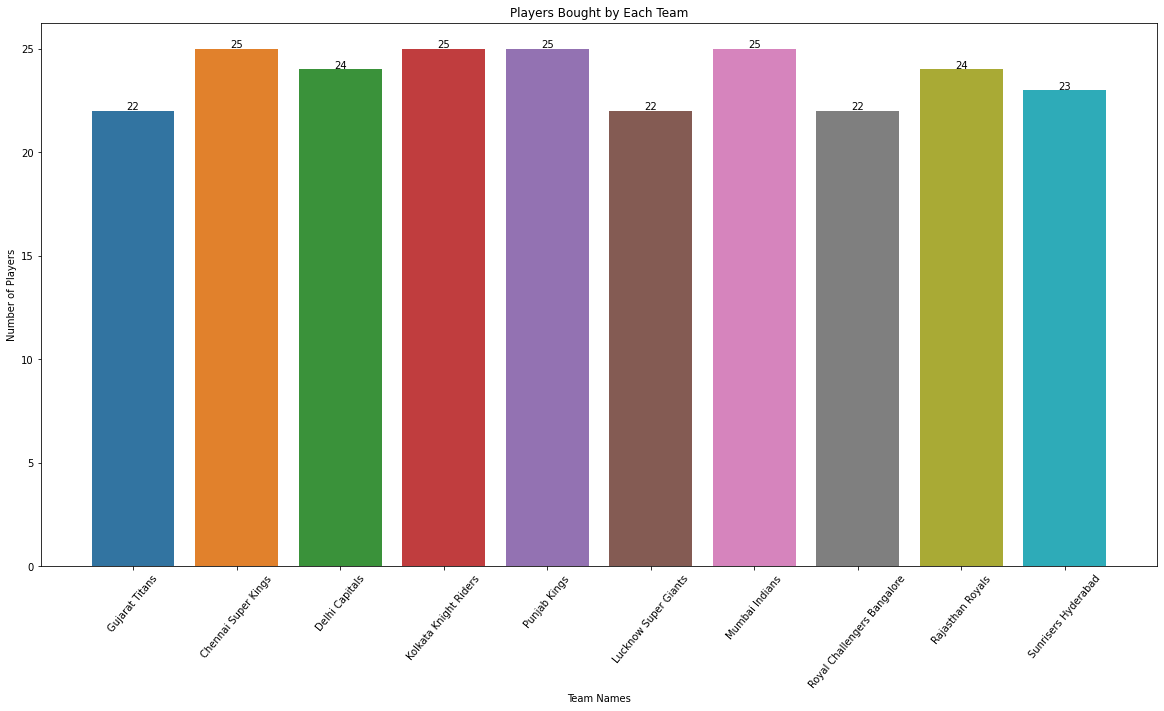

In [25]:
plt.figure(figsize=(20,10))
fig = sns.countplot(df_ipl[df_ipl['Team']!='Unsold']['Team'])
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Players Bought by Each Team', fontsize=12)
plt.xticks(rotation=50)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,4), textcoords='offset points')

In [26]:
df_ipl['Retention'] = df_ipl['Base Price']

In [27]:
df_ipl['Retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh', '50 Lakh', '30 Lakh', '1.5 Cr'],'From Auction', inplace=True)

## Treating Base Price

In [28]:
df_ipl['Base Price'].replace('Draft Pick', 0, inplace=True)

In [29]:
df_ipl['Base_Price_Unit'] = df_ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
df_ipl['Base_Price'] = df_ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [30]:
df_ipl['Base_Price'].replace('Retained', 0, inplace=True)

In [31]:
df_ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Base_Price_Unit,Base_Price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0,0


## Total players retained and bought

In [32]:
df_ipl.groupby(['Team', 'Retention'])['Retention'].count()[:-1]

Team                         Retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

[]

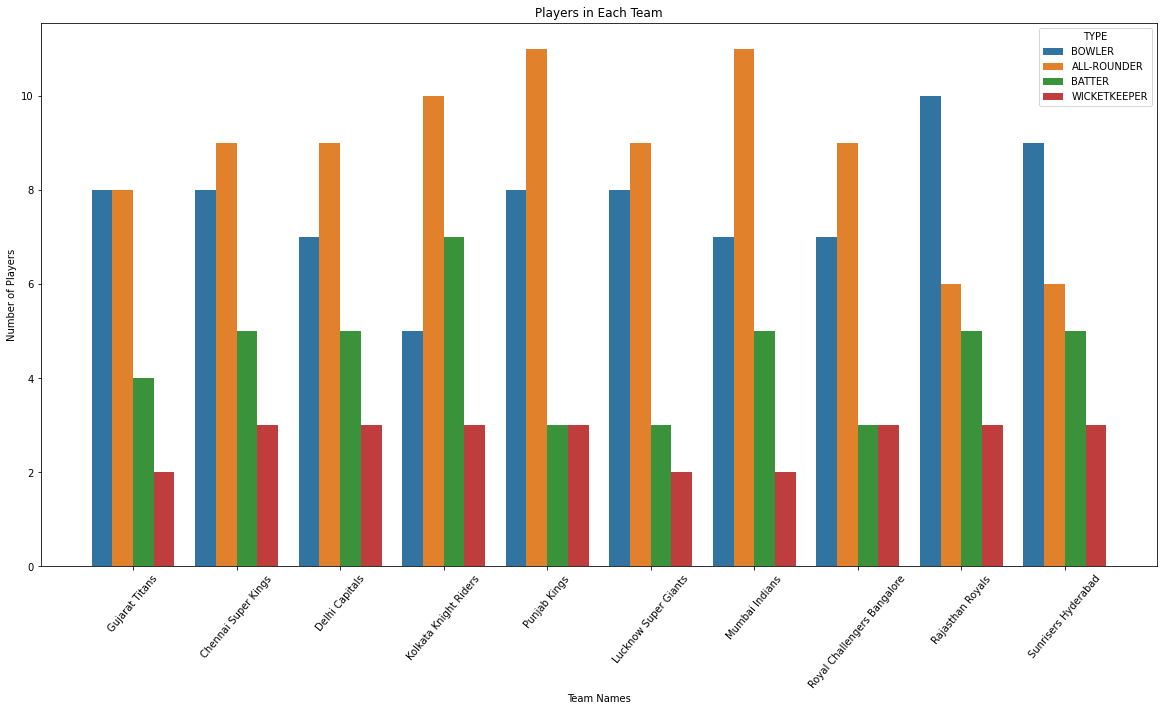

In [33]:
plt.figure(figsize=(20,10))
fig = sns.countplot(df_ipl[df_ipl['Team']!='Unsold']['Team'], hue=df_ipl['TYPE'])
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Players in Each Team')
plt.xticks(rotation=50)
plt.plot()

## Highest amount spent on a single player by each team

In [34]:
df_ipl[df_ipl['Retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

## Player retained at maximum price

In [35]:
df_ipl[df_ipl['Retention']=='Retained'].sort_values(by = 'COST IN ₹ (CR.)', ascending=False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Base_Price_Unit,Base_Price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,Sold,Retained,Retained,0


## Top 5 Bowlers

In [36]:
df_ipl[(df_ipl['Retention']=='From Auction') & (df_ipl['TYPE']=='BOWLER')].sort_values(by = 'COST IN ₹ (CR.)', ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Base_Price_Unit,Base_Price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,Sold,From Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,Sold,From Auction,Cr,2
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,Sold,From Auction,Cr,1
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,Sold,From Auction,Lakh,20


In [37]:
df_ipl[(df_ipl['Retention']=='From Auction') & (df_ipl['TYPE']=='BATTER')].sort_values(by = 'COST IN ₹ (CR.)', ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Base_Price_Unit,Base_Price
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,Sold,From Auction,Cr,2
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals,Sold,From Auction,Cr,1.5
217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,Sold,From Auction,Lakh,40
100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,Sold,From Auction,Cr,2
195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals,Sold,From Auction,Cr,2


In [38]:
df_ipl[(df_ipl['Retention']=='From Auction') & (df_ipl['TYPE']=='ALL-ROUNDER')].sort_values(by = 'COST IN ₹ (CR.)', ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Base_Price_Unit,Base_Price
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings,Sold,From Auction,Cr,1
170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,Sold,From Auction,Cr,1
171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,Sold,From Auction,Cr,2
99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings,Sold,From Auction,Lakh,40
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,Sold,From Auction,Lakh,40


In [39]:
df_ipl = df_ipl.rename(columns={'2021 Squad':'Prev_team'})

In [40]:
Unsold_players = df_ipl[(df_ipl.Prev_team != 'Not Participated') & (df_ipl.Team == 'Unsold')][['Player','Prev_team']]
print(Unsold_players)

                      Player Prev_team
237             Suresh Raina       CSK
238              Steve Smith        DC
239          Shakib Al Hasan       KKR
240              Amit Mishra        DC
241              Adil Rashid      PBKS
242              Imran Tahir       CSK
243            Mujeeb Zadran       SRH
244               Adam Zampa       RCB
245            Rajat Patidar       RCB
246     Mohammed Azharuddeen       RCB
249             M. Siddharth        DC
252              Dawid Malan      PBKS
253              Eoin Morgan       KKR
254        Cheteshwar Pujara       CSK
255           Saurabh Tiwary        MI
257            Ishant Sharma        DC
259            Piyush Chawla        MI
260           Tabraiz Shamsi        RR
262              Sachin Baby       RCB
267              Virat Singh       SRH
269              Akash Singh        RR
273               Chris Lynn        MI
276            George Garton       RCB
288               Andrew Tye        RR
289          Sandeep Warr